In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import pandas as pd
#define file path
opioid_file = "Wide_Master.csv"
#read CSV
opioid_data = pd.read_csv(opioid_file)
#make CSV into a dataframe
opioid_df_raw = pd.DataFrame(opioid_data)


opioid_df_raw.head()

,State,County,Year,Total,Heroin,Other,Methadone,Population,LandArea,Bike,...,Income,Non_US_Born,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance"
0,Alabama,Baldwin,2011,10.0,NaN,NaN,NaN,186717.0,1589.78,1.0,...,67770.0,5147.0,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277
1,Alabama,Cullman,2011,NaN,NaN,NaN,NaN,80536.0,734.84,NaN,...,51374.0,1582.0,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610
2,Alabama,Etowah,2011,NaN,NaN,NaN,NaN,104303.0,534.99,NaN,...,51330.0,1833.0,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563
3,Alabama,Jefferson,2011,39.0,10.0,28.0,10.0,658931.0,1111.28,0.1,...,66409.0,20934.0,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034
4,Alabama,Madison,2011,14.0,NaN,12.0,NaN,340111.0,801.59,0.3,...,76342.0,14164.0,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690


In [2]:
#drop rows which have NaN in columns listed below as they are missing too much information
opioid_df = opioid_df_raw

opioid_df = opioid_df.dropna(subset=['LandArea', 'Income', 'Unemployment', 'GDP Total'])
len(opioid_df.index)

5048

In [3]:
# Make all other NaN in data 0
clean_df=opioid_df.fillna(0)

#Recalculate the Death Total as dataset documentation states totals do not all add up 
#"due to the fact that low death rate of a county was withheld from data to protect privacy of individuals" 
#for this study purposes those deaths with withheld information will not be used. All Death totals is a sum of the three possible causes.
clean_df['Death Total']=clean_df[['Heroin', 'Other', 'Methadone']].sum(axis=1)
#delete the original total column
del clean_df['Total']
clean_df.head(15)


,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Non_US_Born,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,1.0,12.9,...,5147.0,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277,0.0
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,0.0,0.0,...,1582.0,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610,0.0
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,0.0,0.0,...,1833.0,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563,0.0
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,0.1,9.6,...,20934.0,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034,48.0
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,0.3,6.6,...,14164.0,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690,12.0
5,Alabama,Mobile,2011,0.0,0.0,0.0,412577.0,1229.44,0.1,8.3,...,10353.0,34983.0,18327.0,89397.0,45351.0,77770.0,10.8,17901892.0,1474168,0.0
6,Alabama,Shelby,2011,0.0,0.0,0.0,197936.0,784.93,0.0,7.9,...,8237.0,35082.0,16044.0,28446.0,11010.0,37186.0,6.2,8268481.0,490108,0.0
8,Alabama,Tuscaloosa,2011,0.0,0.0,0.0,197211.0,1321.75,0.2,9.5,...,4714.0,17400.0,11918.0,35385.0,16568.0,31285.0,8.3,9382954.0,463507,0.0
9,Alabama,Walker,2011,0.0,0.0,17.0,66661.0,791.19,0.0,0.0,...,579.0,2881.0,1774.0,16597.0,11204.0,14207.0,11.3,1795958.0,185026,17.0
11,Alaska,Fairbanks North Star Borough,2011,0.0,0.0,0.0,99192.0,7338.21,1.1,13.1,...,4231.0,9714.0,6375.0,15289.0,4059.0,22632.0,6.4,5562537.0,375558,0.0


In [4]:
#Attempt to remove string values
clean_df = clean_df.replace(['(D)'], None)

In [5]:
#Attempt failed
clean_df['GDP Education, Health, Social Assistance'].value_counts()

79292      3
680292     3
296435     3
76492      3
74697      3
          ..
1041878    1
1206725    1
149369     1
600284     1
267026     1
Name: GDP Education, Health, Social Assistance, Length: 4896, dtype: int64

In [6]:
#Once string values removed, change column type to make math possible
clean_df['GDP Education, Health, Social Assistance'] = pd.to_numeric(clean_df['GDP Education, Health, Social Assistance'])

In [7]:
# Save into a new CSV called Clean_data.csv for analysis
clean_df.to_csv('clean_data.csv')

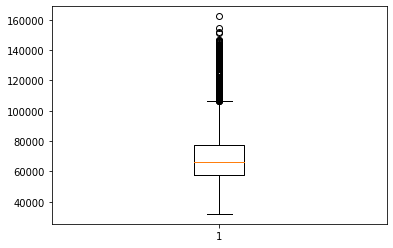

In [8]:
incomes = clean_df['Income']
plt.boxplot(incomes)
plt.show()

In [9]:
quartiles = incomes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


In [10]:

for col in clean_df.columns:
    print(col)

State
County
Year
Heroin
Other
Methadone
Population
LandArea
Bike
Carpool
Alone
Public
Walk
Home
Income
Non_US_Born
Bachelor_Degree
Grad_Degree
HS_Grad
Less_Than_HS
Associates_Degree
Unemployment
GDP Total
GDP Education, Health, Social Assistance
Death Total


In [11]:
#create pop density column
pop_density = clean_df['Population']/clean_df['LandArea']
pop_density

0       117.448326
1       109.596647
2       194.962523
3       592.947772
4       424.295463
           ...    
5407    313.677734
5408    728.971742
5409    392.216161
5410      4.334040
5411     14.895466
Length: 5048, dtype: float64

In [12]:
clean_df['Population Density'] = pop_density
clean_df.head()

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,1.0,12.9,...,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277,0.0,117.448326
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,0.0,0.0,...,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610,0.0,109.596647
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,0.0,0.0,...,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563,0.0,194.962523
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,0.1,9.6,...,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034,48.0,592.947772
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,0.3,6.6,...,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690,12.0,424.295463


In [13]:
#create new dataframe for education data analysis
edu_df = clean_df.iloc[:,[16,17,18,19,20]]
edu_df.head()

,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree
0,22946.0,10923.0,36271.0,15094.0,39216.0
1,4807.0,2940.0,17883.0,12788.0,16286.0
2,6642.0,4270.0,22939.0,13064.0,24325.0
3,78798.0,48016.0,121313.0,58142.0,131726.0
4,50973.0,30157.0,48925.0,24067.0,62801.0


In [14]:
#create new list with total educated
edu_df['Total Educated'] = edu_df.sum(axis=1)
edu_df['Bachelors %'] = edu_df['Bachelor_Degree']/edu_df['Total Educated']*100
edu_df['Grad %'] = edu_df['Grad_Degree']/edu_df['Total Educated']*100
edu_df['HS %'] = edu_df['HS_Grad']/edu_df['Total Educated']*100
edu_df['Less HS %'] = edu_df['Less_Than_HS']/edu_df['Total Educated']*100
edu_df['Associates %'] = edu_df['Associates_Degree']/edu_df['Total Educated']*100
del edu_df['Bachelor_Degree']
del edu_df['Grad_Degree']                             
del edu_df['HS_Grad']                                     
del edu_df['Less_Than_HS']                                
del edu_df['Associates_Degree']
edu_df

C:\Users\cande\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %
0,124450.0,18.437927,8.777019,29.145038,12.128566,31.511450
1,54704.0,8.787292,5.374378,32.690480,23.376718,29.771132
2,71240.0,9.323414,5.993824,32.199607,18.338012,34.145143
3,437995.0,17.990616,10.962682,27.697348,13.274581,30.074773
4,216923.0,23.498200,13.902168,22.554086,11.094720,28.950826
...,...,...,...,...,...,...
5407,93734.0,21.674099,8.029104,30.188619,5.580686,34.527493
5408,277757.0,28.266074,14.650576,23.609126,3.997739,29.476485
5409,113634.0,19.547847,7.777602,34.327754,7.637679,30.709119
5410,26781.0,15.525933,7.740562,31.727717,8.890631,36.115156


In [15]:
clean_df.dtypes


State                                        object
County                                       object
Year                                          int64
Heroin                                      float64
Other                                       float64
Methadone                                   float64
Population                                  float64
LandArea                                    float64
Bike                                        float64
Carpool                                     float64
Alone                                       float64
Public                                      float64
Walk                                        float64
Home                                        float64
Income                                      float64
Non_US_Born                                 float64
Bachelor_Degree                             float64
Grad_Degree                                 float64
HS_Grad                                     float64
Less_Than_HS

In [16]:
combined_df = pd.merge(clean_df,edu_df, left_index=True,right_index=True)
del combined_df['Bike']
del combined_df['Alone']
del combined_df['Carpool']
del combined_df['Walk']
del combined_df['Home']
del combined_df['Public']
del combined_df['Bachelor_Degree']
del combined_df['Grad_Degree']                             
del combined_df['HS_Grad']                                     
del combined_df['Less_Than_HS']                                
del combined_df['Associates_Degree']
combined_df

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,...,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,67770.0,5147.0,...,5016735.0,478277,0.0,117.448326,124450.0,18.437927,8.777019,29.145038,12.128566,31.511450
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,51374.0,1582.0,...,2298846.0,207610,0.0,109.596647,54704.0,8.787292,5.374378,32.690480,23.376718,29.771132
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,51330.0,1833.0,...,2801621.0,430563,0.0,194.962523,71240.0,9.323414,5.993824,32.199607,18.338012,34.145143
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,66409.0,20934.0,...,39515681.0,4542034,48.0,592.947772,437995.0,17.990616,10.962682,27.697348,13.274581,30.074773
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,76342.0,14164.0,...,19512201.0,1135690,12.0,424.295463,216923.0,23.498200,13.902168,22.554086,11.094720,28.950826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,Wisconsin,Washington,2017,0.0,12.0,0.0,135101.0,430.70,89470.0,2956.0,...,5636773.0,476010,12.0,313.677734,93734.0,21.674099,8.029104,30.188619,5.580686,34.527493
5408,Wisconsin,Waukesha,2017,27.0,27.0,0.0,400621.0,549.57,105275.0,17376.0,...,28028503.0,2927629,54.0,728.971742,277757.0,28.266074,14.650576,23.609126,3.997739,29.476485
5409,Wisconsin,Winnebago,2017,0.0,0.0,0.0,170414.0,434.49,71572.0,4719.0,...,9274302.0,649081,0.0,392.216161,113634.0,19.547847,7.777602,34.327754,7.637679,30.709119
5410,Wyoming,Fremont,2017,0.0,0.0,0.0,39803.0,9183.81,70101.0,469.0,...,1595939.0,138479,0.0,4.334040,26781.0,15.525933,7.740562,31.727717,8.890631,36.115156


In [17]:
state_df = combined_df.groupby(['State'])[['Heroin', 'Other','Methadone','Death Total']].sum()
state_df

,Heroin,Other,Methadone,Death Total
State,,,,
Alabama,428.0,328.0,108.0,864.0
Alaska,0.0,10.0,0.0,10.0
Arizona,1324.0,2151.0,409.0,3884.0
Arkansas,0.0,271.0,0.0,271.0
California,3127.0,6625.0,1483.0,11235.0
Colorado,358.0,542.0,21.0,921.0
Connecticut,1930.0,860.0,286.0,3076.0
Delaware,331.0,263.0,32.0,626.0
Florida,1826.0,5279.0,1127.0,8232.0


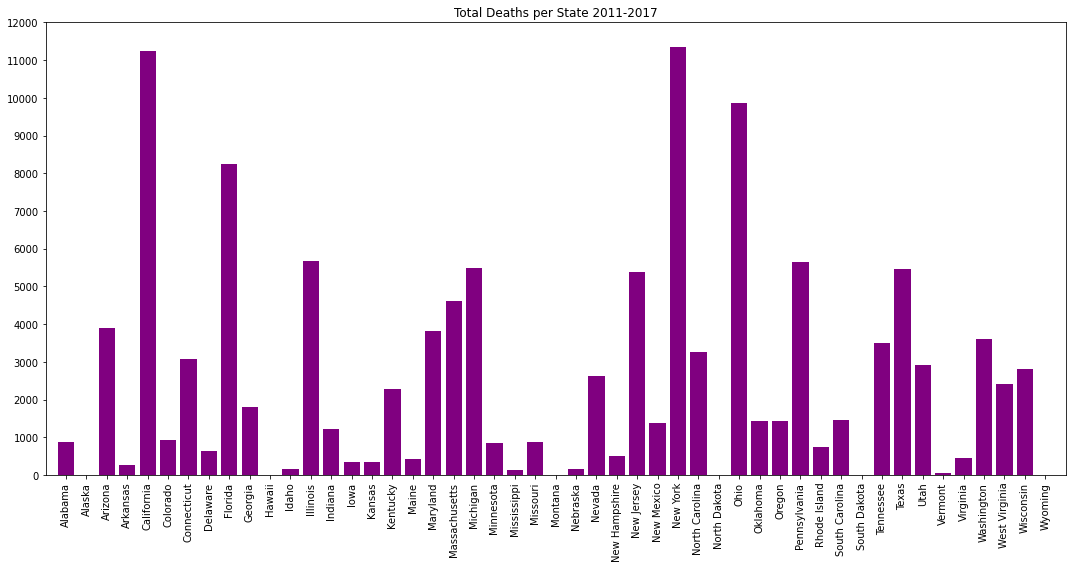

In [18]:
# Total Deaths per State 2011-2017
yticks = [0, 1000, 2000, 3000, 4000, 5000, 
          6000, 7000, 8000, 9000, 10000, 11000, 12000]
plt.figure(figsize=(15, 8))
plt.bar(state_df.index, state_df['Death Total'], color='purple')
plt.title('Total Deaths per State 2011-2017')
plt.xticks(rotation='vertical')
plt.yticks(yticks)
plt.tight_layout()
plt.xlim(-1, 49, -.1)
plt.savefig('Total Deaths per State 2011-2017')
plt.show()

In [19]:
combined_df.head()

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,...,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,67770.0,5147.0,...,5016735.0,478277,0.0,117.448326,124450.0,18.437927,8.777019,29.145038,12.128566,31.511450
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,51374.0,1582.0,...,2298846.0,207610,0.0,109.596647,54704.0,8.787292,5.374378,32.690480,23.376718,29.771132
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,51330.0,1833.0,...,2801621.0,430563,0.0,194.962523,71240.0,9.323414,5.993824,32.199607,18.338012,34.145143
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,66409.0,20934.0,...,39515681.0,4542034,48.0,592.947772,437995.0,17.990616,10.962682,27.697348,13.274581,30.074773
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,76342.0,14164.0,...,19512201.0,1135690,12.0,424.295463,216923.0,23.498200,13.902168,22.554086,11.094720,28.950826


In [20]:
combined_df = pd.merge(clean_df,edu_df, left_index=True,right_index=True)
del combined_df['Bike']
del combined_df['Alone']
del combined_df['Carpool']
del combined_df['Walk']
del combined_df['Home']
del combined_df['Public']
del combined_df['Bachelor_Degree']
del combined_df['Grad_Degree']                             
del combined_df['HS_Grad']                                     
del combined_df['Less_Than_HS']                                
del combined_df['Associates_Degree']
combined_df
aver_income = combined_df.groupby(['State'])[['Income', 'Non_US_Born','GDP Total']].mean()
state_df = combined_df.groupby(['State'])[['Heroin', 'Other','Methadone','Death Total', 'Population','LandArea']].sum()
state_df = pd.merge(aver_income, state_df, left_index=True,right_index=True)
state_df

,Income,Non_US_Born,GDP Total,Heroin,Other,Methadone,Death Total,Population,LandArea
State,,,,,,,,,
Alabama,64576.730159,7910.634921,1.205206e+07,428.0,328.0,108.0,864.0,15980631.0,62298.53
Alaska,81870.142857,2794.357143,4.190802e+06,0.0,10.0,0.0,10.0,1102195.0,163894.78
Arizona,61884.119048,113064.333333,4.311028e+07,1324.0,2151.0,409.0,3884.0,42349012.0,359471.42
Arkansas,62702.000000,9158.428571,8.413269e+06,0.0,271.0,0.0,271.0,7268049.0,28934.50
California,80820.428571,246919.938776,6.374420e+07,3127.0,6625.0,1483.0,11235.0,255751474.0,770515.90
Colorado,81450.071429,25159.214286,1.841025e+07,358.0,542.0,21.0,921.0,15631911.0,84533.54
Connecticut,94811.339286,52695.250000,3.030717e+07,1930.0,860.0,286.0,3076.0,25119335.0,33896.52
Delaware,74631.523810,22013.095238,2.091484e+07,331.0,263.0,32.0,626.0,6545528.0,13639.85
Florida,66936.857143,58201.710204,1.920038e+07,1826.0,5279.0,1127.0,8232.0,111108367.0,216777.75


In [21]:
#create new dataframes by year
eleven_df = clean_df.loc[clean_df['Year']==2011]
eleven_df.head(-10)

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,1.0,12.9,...,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277,0.0,117.448326
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,0.0,0.0,...,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610,0.0,109.596647
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,0.0,0.0,...,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563,0.0,194.962523
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,0.1,9.6,...,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034,48.0,592.947772
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,0.3,6.6,...,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690,12.0,424.295463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,Wisconsin,Manitowoc,2011,0.0,0.0,0.0,80976.0,589.08,0.6,7.9,...,7106.0,2911.0,24014.0,5578.0,17114.0,8.4,3972681.0,281218,0.0,137.461805
759,Wisconsin,Marathon,2011,0.0,0.0,0.0,134400.0,1544.98,0.4,8.6,...,12867.0,6216.0,34268.0,10085.0,26389.0,7.9,7136532.0,778481,0.0,86.991417
760,Wisconsin,Milwaukee,2011,43.0,83.0,23.0,952532.0,241.40,0.7,10.2,...,105780.0,57032.0,179899.0,88597.0,169073.0,9.3,52546231.0,7433093,149.0,3945.865783
761,Wisconsin,Outagamie,2011,0.0,0.0,0.0,177913.0,637.52,0.6,8.2,...,21427.0,8455.0,41078.0,8644.0,36016.0,7.1,9607379.0,926827,0.0,279.070461


In [22]:
twelve_df = clean_df.loc[clean_df['Year']==2012]
thirteen_df = clean_df.loc[clean_df['Year']==2013]
fourteen_df = clean_df.loc[clean_df['Year']==2014]
fifteen_df = clean_df.loc[clean_df['Year']==2015]
sixteen_df = clean_df.loc[clean_df['Year']==2016]
seventeen_df = clean_df.loc[clean_df['Year']==2017]

In [23]:
#create new columns by state and year showing deaths
eleven_state = eleven_df.groupby(['State'])['Death Total'].sum()
twelve_state = twelve_df.groupby(['State'])['Death Total'].sum()
thirteen_state = thirteen_df.groupby(['State'])['Death Total'].sum()
fourteen_state = fourteen_df.groupby(['State'])['Death Total'].sum()
fifteen_state = fifteen_df.groupby(['State'])['Death Total'].sum()
sixteen_state = sixteen_df.groupby(['State'])['Death Total'].sum()
seventeen_state = seventeen_df.groupby(['State'])['Death Total'].sum()

In [24]:
#new dataframe deaths by state by year
year_death = pd.DataFrame({'2011':eleven_state, '2012':twelve_state, '2013':thirteen_state, '2014':fourteen_state, '2015':fifteen_state, '2016':sixteen_state, '2017':seventeen_state})
year_death.head()

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,77.0,59.0,74.0,180.0,154.0,158.0,162.0
Alaska,0.0,0.0,0.0,0.0,10.0,0.0,0.0
Arizona,475.0,475.0,414.0,529.0,575.0,664.0,752.0
Arkansas,18.0,22.0,33.0,51.0,56.0,47.0,44.0
California,1665.0,1493.0,1615.0,1685.0,1657.0,1488.0,1632.0


In [25]:
#create new columns by state and year showing income
eleven_inc = eleven_df.groupby(['State'])['Income'].sum()
twelve_inc = twelve_df.groupby(['State'])['Income'].sum()
thirteen_inc = thirteen_df.groupby(['State'])['Income'].sum()
fourteen_inc = fourteen_df.groupby(['State'])['Income'].sum()
fifteen_inc = fifteen_df.groupby(['State'])['Income'].sum()
sixteen_inc = sixteen_df.groupby(['State'])['Income'].sum()
seventeen_inc = seventeen_df.groupby(['State'])['Income'].sum()

In [26]:
#new dataframe income by state by year
year_inc = pd.DataFrame({'2011':eleven_inc, '2012':twelve_inc, '2013':thirteen_inc, '2014':fourteen_inc, '2015':fifteen_inc, '2016':sixteen_inc, '2017':seventeen_inc})
year_inc.head()

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,569913.0,570394.0,571200.0,576216.0,575951.0,590999.0,613661.0
Alaska,155319.0,158303.0,160167.0,162600.0,164571.0,170564.0,174658.0
Arizona,368639.0,366319.0,363543.0,364597.0,366530.0,376738.0,392767.0
Arkansas,360287.0,361845.0,367536.0,374906.0,377832.0,386811.0,404267.0
California,2738692.0,2738594.0,2739794.0,2778962.0,2809359.0,2917914.0,3077690.0


In [27]:
#create new columns by state and year showing population
eleven_pop = eleven_df.groupby(['State'])['Population'].sum()
twelve_pop = twelve_df.groupby(['State'])['Population'].sum()
thirteen_pop = thirteen_df.groupby(['State'])['Population'].sum()
fourteen_pop = fourteen_df.groupby(['State'])['Population'].sum()
fifteen_pop = fifteen_df.groupby(['State'])['Population'].sum()
sixteen_pop = sixteen_df.groupby(['State'])['Population'].sum()
seventeen_pop = seventeen_df.groupby(['State'])['Population'].sum()

In [28]:
#new dataframe population by state and year
year_pop = pd.DataFrame({'2011':eleven_pop, '2012':twelve_pop, '2013':thirteen_pop, '2014':fourteen_pop, '2015':fifteen_pop, '2016':sixteen_pop, '2017':seventeen_pop})
year_pop.head()

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,2244983.0,2258405.0,2271731.0,2285484.0,2295605.0,2306613.0,2317810.0
Alaska,155485.0,157172.0,157583.0,156834.0,157690.0,159111.0,158320.0
Arizona,5800333.0,5869987.0,5942952.0,6043278.0,6137975.0,6234324.0,6320163.0
Arkansas,1009576.0,1019219.0,1029140.0,1036537.0,1046456.0,1057781.0,1069340.0
California,35583917.0,35924434.0,36203764.0,36652918.0,36977204.0,37073424.0,37335813.0


In [29]:
# #2011 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(eleven_inc.index,eleven_inc)
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [30]:
# #2012 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(twelve_inc.index, twelve_inc, color='red')
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [31]:
# #2013 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(thirteen_inc.index,thirteen_inc, color='green')
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [32]:
# #2014 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(fourteen_inc.index, fourteen_inc, color='pink')
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [33]:
# #2015 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(fifteen_inc.index,fifteen_inc, color='yellow')
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [34]:
# #2016 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(sixteen_inc.index,sixteen_inc, color='orange')
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [35]:
# #2017 Income by State
# plt.figure(figsize=(20,10))
# plt.bar(seventeen_inc.index,seventeen_inc, color='black')
# plt.xticks(rotation='vertical')
# # plt.yticks(yticks)
# plt.xlim(-1,49)
# plt.show()

In [36]:
#new dataframe with income per capita
inc_per = year_inc/year_pop 

In [37]:
inc_per.head()

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,0.253861,0.252565,0.251438,0.252120,0.250893,0.256219,0.264759
Alaska,0.998932,1.007196,1.016398,1.036765,1.043636,1.071981,1.103196
Arizona,0.063555,0.062405,0.061172,0.060331,0.059715,0.060430,0.062145
Arkansas,0.356870,0.355022,0.357129,0.361691,0.361059,0.365682,0.378053
California,0.076964,0.076232,0.075677,0.075818,0.075975,0.078706,0.082433


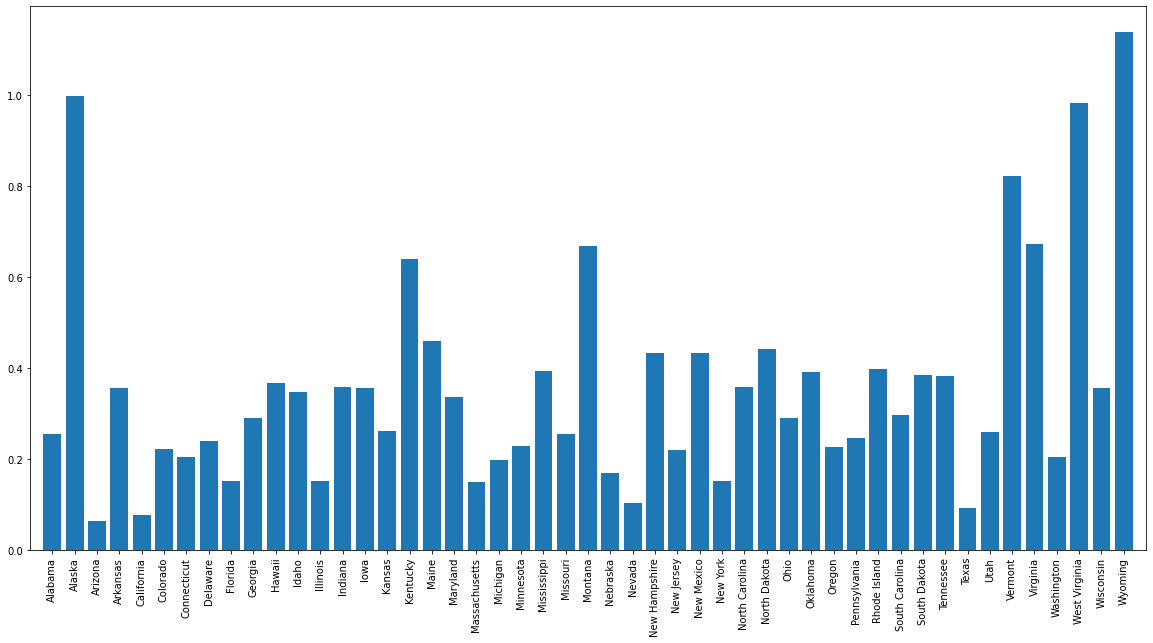

In [38]:
# 2011 Income per Capita 
plt.figure(figsize=(20,10))
plt.bar(inc_per.index, inc_per['2011'])
plt.xlim(-1,49)
plt.xticks(rotation='vertical')
plt.show()

In [39]:
#new dataframe with deaths per capita
death_per = year_death/year_pop
death_per.head()

,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,
Alabama,0.000034,0.000026,0.000033,0.000079,0.000067,0.000068,0.000070
Alaska,0.000000,0.000000,0.000000,0.000000,0.000063,0.000000,0.000000
Arizona,0.000082,0.000081,0.000070,0.000088,0.000094,0.000107,0.000119
Arkansas,0.000018,0.000022,0.000032,0.000049,0.000054,0.000044,0.000041
California,0.000047,0.000042,0.000045,0.000046,0.000045,0.000040,0.000044


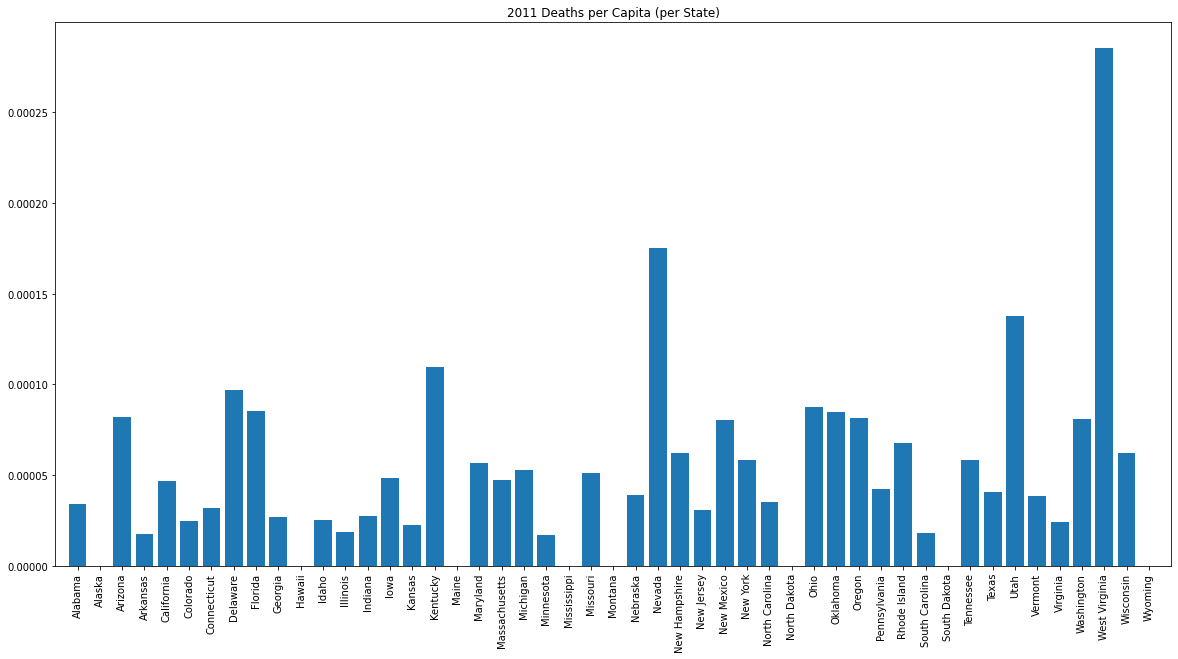

In [40]:
# 2011 Death per Capita 
plt.figure(figsize=(20,10))
plt.bar(death_per.index, death_per['2011'])
plt.xlim(-1, 49)
plt.xticks(rotation='vertical')
plt.title('2011 Deaths per Capita (per State)')
plt.savefig('2011 Deaths per Capita')
plt.show()

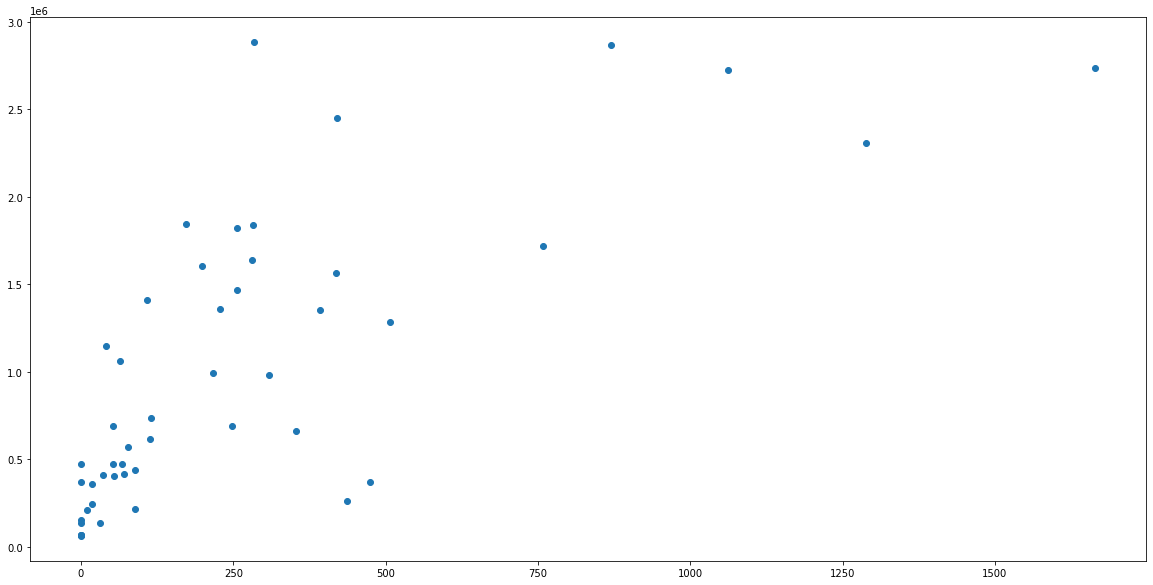

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(eleven_state, eleven_inc)

# plt.xticks()
plt.show()

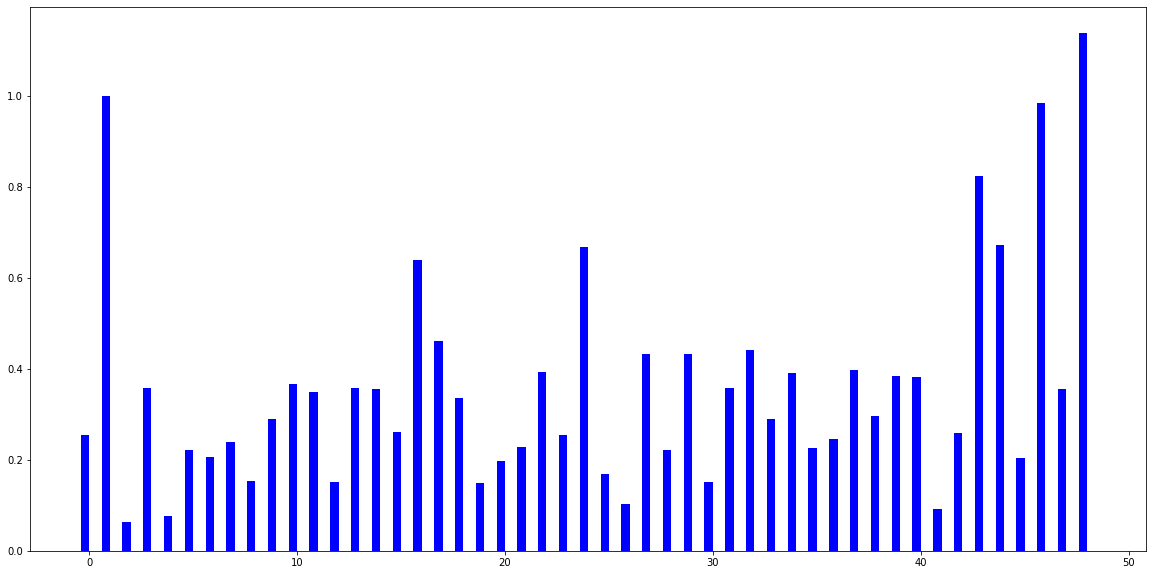

In [42]:
## Trying to figure out a Grouped Bar Chart
plt.figure(figsize=(20,10))
# create data
x = np.arange(len(inc_per['2011']))
y1 = list(inc_per['2011'])
y2 = list(death_per['2011'])
width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x+0.2, y2, width, color='orange')


plt.show()

In [43]:
  
# # create data
# x = np.arange(5)
# y1 = [34, 56, 12, 89, 67]
# y2 = [12, 56, 78, 45, 90]
# width = 0.40
  
# # plot data in grouped manner of bar type
# plt.bar(x-0.2, y1, width)
# plt.bar(x+0.2, y2, width)

In [44]:
illinois = clean_df.loc[(clean_df["State"] == 'Illinois')]
illinois

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density
157,Illinois,Boone,2011,0.0,0.0,0.0,54367.0,280.72,0.0,0.0,...,4457.0,2266.0,12771.0,4924.0,9532.0,11.8,1525553.0,50544,0.0,193.669849
158,Illinois,Champaign,2011,0.0,0.0,0.0,201685.0,996.27,2.3,8.4,...,23145.0,23896.0,25866.0,7898.0,30948.0,7.8,9965196.0,900448,0.0,202.440102
159,Illinois,Cook,2011,0.0,20.0,24.0,5217080.0,945.33,0.9,9.0,...,702595.0,454599.0,846798.0,558624.0,871506.0,10.4,334992169.0,31781061,44.0,5518.792379
160,Illinois,DeKalb,2011,0.0,0.0,0.0,104743.0,631.31,1.0,11.8,...,10603.0,5954.0,17179.0,5167.0,19861.0,9.3,3531746.0,316371,0.0,165.913735
161,Illinois,DuPage,2011,25.0,18.0,0.0,923222.0,327.50,0.3,7.0,...,171348.0,105676.0,120413.0,49466.0,160845.0,8.2,73870349.0,5951598,43.0,2818.998473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,Illinois,Tazewell,2017,0.0,0.0,0.0,133526.0,648.97,0.2,4.1,...,17038.0,7330.0,30198.0,6702.0,32438.0,5.4,8206096.0,238764,0.0,205.750651
4815,Illinois,Vermilion,2017,12.0,0.0,0.0,77909.0,898.37,0.0,9.7,...,5532.0,2339.0,21942.0,6867.0,17145.0,6.5,3285723.0,184370,12.0,86.722620
4816,Illinois,Will,2017,84.0,15.0,0.0,692661.0,836.91,0.1,5.3,...,95679.0,53654.0,119492.0,40819.0,135319.0,5.0,28209374.0,2236225,99.0,827.640965
4817,Illinois,Williamson,2017,0.0,0.0,0.0,67328.0,420.15,0.0,0.0,...,6288.0,4401.0,14273.0,4338.0,18236.0,5.2,2796011.0,324963,0.0,160.247531


In [45]:
cook = clean_df.loc[(clean_df["State"] == 'Illinois') & (clean_df['County'] == 'Cook')]
cook

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density
159,Illinois,Cook,2011,0.0,20.0,24.0,5217080.0,945.33,0.9,9.0,...,702595.0,454599.0,846798.0,558624.0,871506.0,10.4,334992169.0,31781061,44.0,5518.792379
932,Illinois,Cook,2012,27.0,44.0,33.0,5231351.0,945.33,1.1,9.2,...,715158.0,469041.0,836745.0,550149.0,885724.0,9.6,338427304.0,31932614,104.0,5533.888695
1705,Illinois,Cook,2013,301.0,83.0,43.0,5240700.0,945.33,0.9,8.6,...,726485.0,482371.0,842779.0,541355.0,891581.0,9.6,342176485.0,32220427,427.0,5543.778363
2478,Illinois,Cook,2014,339.0,66.0,37.0,5246456.0,945.33,1.0,8.1,...,746058.0,492894.0,846674.0,532846.0,894932.0,7.5,348451260.0,33068212,442.0,5549.867242
3251,Illinois,Cook,2015,368.0,78.0,42.0,5238216.0,945.33,1.1,7.9,...,759678.0,505545.0,847218.0,520304.0,904434.0,6.2,351380397.0,33740484,488.0,5541.150709
4024,Illinois,Cook,2016,546.0,134.0,57.0,5203499.0,945.33,1.1,7.7,...,775888.0,517630.0,839916.0,503252.0,910002.0,6.0,354454887.0,33749362,737.0,5504.425968
4798,Illinois,Cook,2017,682.0,167.0,87.0,5211263.0,945.33,1.1,8.0,...,796547.0,534409.0,841480.0,494411.0,911935.0,5.1,362063569.0,35009779,936.0,5512.638973


In [46]:
dupage = clean_df.loc[(clean_df["State"] == 'Illinois') & (clean_df['County'] == 'DuPage')]
dupage

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density
161,Illinois,DuPage,2011,25.0,18.0,0.0,923222.0,327.5,0.3,7.0,...,171348.0,105676.0,120413.0,49466.0,160845.0,8.2,73870349.0,5951598,43.0,2818.998473
934,Illinois,DuPage,2012,43.0,13.0,0.0,927987.0,327.5,0.5,8.4,...,173861.0,108098.0,119324.0,49434.0,162970.0,7.5,75354940.0,6047755,56.0,2833.548092
1707,Illinois,DuPage,2013,45.0,0.0,0.0,932126.0,327.5,0.3,7.5,...,176529.0,109697.0,119881.0,48811.0,163837.0,7.4,76840176.0,6269614,45.0,2846.186260
2480,Illinois,DuPage,2014,44.0,17.0,0.0,932708.0,327.5,0.3,7.4,...,177894.0,113375.0,119917.0,48152.0,164259.0,5.8,79834105.0,6473555,61.0,2847.963359
3253,Illinois,DuPage,2015,46.0,23.0,0.0,933736.0,327.5,0.3,7.2,...,177314.0,115852.0,119341.0,47837.0,167138.0,4.8,80271717.0,6620017,69.0,2851.102290
4026,Illinois,DuPage,2016,62.0,24.0,10.0,929368.0,327.5,0.5,6.5,...,180458.0,117315.0,117893.0,47598.0,166117.0,4.7,81750103.0,6742926,96.0,2837.764885
4800,Illinois,DuPage,2017,66.0,32.0,10.0,930128.0,327.5,0.4,6.4,...,183959.0,119948.0,117126.0,48155.0,163724.0,3.9,82596221.0,6920972,108.0,2840.085496


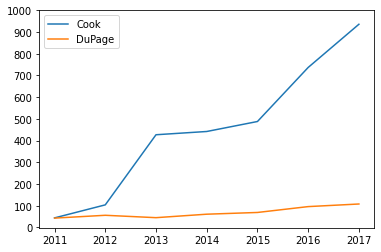

In [47]:
yyticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['Cook','DuPage']
plt.plot(cook['Year'], cook['Death Total'])
plt.plot(dupage['Year'], dupage['Death Total'])
plt.yticks(yyticks)
plt.legend(labels)
plt.show()

In [48]:
il_deathPer = illinois['Death Total']/illinois['Population']
il_deathPer

157     0.000000
158     0.000000
159     0.000008
160     0.000000
161     0.000047
          ...   
4814    0.000000
4815    0.000154
4816    0.000143
4817    0.000000
4818    0.000232
Length: 154, dtype: float64

In [58]:
death_per = clean_df['Death Total']/clean_df['Population']* 100
inc_per = clean_df['Income']/clean_df['Population']* 100
gdp_edu_Per = clean_df['GDP Education, Health, Social Assistance']/clean_df['GDP Total']* 100
non_us_Per = clean_df['Non_US_Born']/clean_df['Population']*100

In [59]:
clean_df['Deaths Per Capita'] = death_per
clean_df['Income Per Capita'] = inc_per
clean_df['GDP EHSA Percent of Total'] = gdp_edu_Per
clean_df['Percent Non-US Born'] = non_us_Per
clean_df.head()

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Deaths Per Capita,Income Per Capita,GDP EHSA Percent of Total,Percent Non-US Born
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,1.0,12.9,...,39216.0,9.0,5016735.0,478277,0.0,117.448326,0.000000,36.295570,9.533631,2.756578
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,0.0,0.0,...,16286.0,9.5,2298846.0,207610,0.0,109.596647,0.000000,63.790106,9.031053,1.964339
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,0.0,0.0,...,24325.0,10.0,2801621.0,430563,0.0,194.962523,0.000000,49.212391,15.368353,1.757380
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,0.1,9.6,...,131726.0,9.3,39515681.0,4542034,48.0,592.947772,0.007285,10.078293,11.494257,3.176964
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,0.3,6.6,...,62801.0,8.3,19512201.0,1135690,12.0,424.295463,0.003528,22.446201,5.820409,4.164523


In [49]:
il_incPer = illinois['Income']/illinois['Population']
il_incPer

157     1.417569
158     0.310316
159     0.014875
160     0.634410
161     0.111886
          ...   
4814    0.586822
4815    0.744099
4816    0.142364
4817    0.939490
4818    0.235885
Length: 154, dtype: float64

In [50]:
illinois['Deaths Per Capita'] = il_deathPer
illinois['Income Per Capita'] = il_incPer
illinois.head()

C:\Users\cande\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Deaths Per Capita,Income Per Capita
157,Illinois,Boone,2011,0.0,0.0,0.0,54367.0,280.72,0.0,0.0,...,12771.0,4924.0,9532.0,11.8,1525553.0,50544,0.0,193.669849,0.000000,1.417569
158,Illinois,Champaign,2011,0.0,0.0,0.0,201685.0,996.27,2.3,8.4,...,25866.0,7898.0,30948.0,7.8,9965196.0,900448,0.0,202.440102,0.000000,0.310316
159,Illinois,Cook,2011,0.0,20.0,24.0,5217080.0,945.33,0.9,9.0,...,846798.0,558624.0,871506.0,10.4,334992169.0,31781061,44.0,5518.792379,0.000008,0.014875
160,Illinois,DeKalb,2011,0.0,0.0,0.0,104743.0,631.31,1.0,11.8,...,17179.0,5167.0,19861.0,9.3,3531746.0,316371,0.0,165.913735,0.000000,0.634410
161,Illinois,DuPage,2011,25.0,18.0,0.0,923222.0,327.50,0.3,7.0,...,120413.0,49466.0,160845.0,8.2,73870349.0,5951598,43.0,2818.998473,0.000047,0.111886


In [55]:
gdp_eduPer = illinois['GDP Education, Health, Social Assistance']/illinois['GDP Total']* 100
illinois['GDP EHSA Percent of Total'] = gdp_eduPer
illinois.head()

C:\Users\cande\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Deaths Per Capita,Income Per Capita,GDP EHSA Percent of Total,Percent Non-US Born
157,Illinois,Boone,2011,0.0,0.0,0.0,54367.0,280.72,0.0,0.0,...,9532.0,11.8,1525553.0,50544,0.0,193.669849,0.000000,1.417569,3.313159,0.089632
158,Illinois,Champaign,2011,0.0,0.0,0.0,201685.0,996.27,2.3,8.4,...,30948.0,7.8,9965196.0,900448,0.0,202.440102,0.000000,0.310316,9.035929,0.072251
159,Illinois,Cook,2011,0.0,20.0,24.0,5217080.0,945.33,0.9,9.0,...,871506.0,10.4,334992169.0,31781061,44.0,5518.792379,0.000008,0.014875,9.487106,0.179563
160,Illinois,DeKalb,2011,0.0,0.0,0.0,104743.0,631.31,1.0,11.8,...,19861.0,9.3,3531746.0,316371,0.0,165.913735,0.000000,0.634410,8.957921,0.052748
161,Illinois,DuPage,2011,25.0,18.0,0.0,923222.0,327.50,0.3,7.0,...,160845.0,8.2,73870349.0,5951598,43.0,2818.998473,0.000047,0.111886,8.056816,0.154383


In [56]:
non_usPer = illinois['Non_US_Born']/illinois['Population']*100
non_usPer

157      8.963158
158      7.225128
159     17.956309
160      5.274816
161     15.438324
          ...    
4814     1.661849
4815     1.950994
4816    10.688778
4817     1.409518
4818     6.978067
Length: 154, dtype: float64

In [57]:
illinois['Percent Non-US Born'] = non_usPer
illinois.head()

C:\Users\cande\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Deaths Per Capita,Income Per Capita,GDP EHSA Percent of Total,Percent Non-US Born
157,Illinois,Boone,2011,0.0,0.0,0.0,54367.0,280.72,0.0,0.0,...,9532.0,11.8,1525553.0,50544,0.0,193.669849,0.000000,1.417569,3.313159,8.963158
158,Illinois,Champaign,2011,0.0,0.0,0.0,201685.0,996.27,2.3,8.4,...,30948.0,7.8,9965196.0,900448,0.0,202.440102,0.000000,0.310316,9.035929,7.225128
159,Illinois,Cook,2011,0.0,20.0,24.0,5217080.0,945.33,0.9,9.0,...,871506.0,10.4,334992169.0,31781061,44.0,5518.792379,0.000008,0.014875,9.487106,17.956309
160,Illinois,DeKalb,2011,0.0,0.0,0.0,104743.0,631.31,1.0,11.8,...,19861.0,9.3,3531746.0,316371,0.0,165.913735,0.000000,0.634410,8.957921,5.274816
161,Illinois,DuPage,2011,25.0,18.0,0.0,923222.0,327.50,0.3,7.0,...,160845.0,8.2,73870349.0,5951598,43.0,2818.998473,0.000047,0.111886,8.056816,15.438324


In [62]:
above_high = clean_df['Bachelor_Degree']+clean_df['Grad_Degree']+clean_df['Associates_Degree']
high_orBelow = clean_df['Less_Than_HS']+clean_df['HS_Grad']
clean_df['> High School'] = above_high
clean_df['<= High School'] = high_orBelow
clean_df.head()

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Deaths Per Capita,Income Per Capita,GDP EHSA Percent of Total,Percent Non-US Born,> High School,<= High School
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,1.0,12.9,...,5016735.0,478277,0.0,117.448326,0.000000,36.295570,9.533631,2.756578,73085.0,51365.0
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,0.0,0.0,...,2298846.0,207610,0.0,109.596647,0.000000,63.790106,9.031053,1.964339,24033.0,30671.0
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,0.0,0.0,...,2801621.0,430563,0.0,194.962523,0.000000,49.212391,15.368353,1.757380,35237.0,36003.0
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,0.1,9.6,...,39515681.0,4542034,48.0,592.947772,0.007285,10.078293,11.494257,3.176964,258540.0,179455.0
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,0.3,6.6,...,19512201.0,1135690,12.0,424.295463,0.003528,22.446201,5.820409,4.164523,143931.0,72992.0


In [60]:
for col in clean_df.columns:
    print(col)

State
County
Year
Heroin
Other
Methadone
Population
LandArea
Bike
Carpool
Alone
Public
Walk
Home
Income
Non_US_Born
Bachelor_Degree
Grad_Degree
HS_Grad
Less_Than_HS
Associates_Degree
Unemployment
GDP Total
GDP Education, Health, Social Assistance
Death Total
Population Density
Deaths Per Capita
Income Per Capita
GDP EHSA Percent of Total
Percent Non-US Born
